In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

In [11]:
df1 = pd.read_excel(file_path, sheet_name='材料1')
df2 = pd.read_excel(file_path, sheet_name='材料2')
df3 = pd.read_excel(file_path, sheet_name='材料3')
df4 = pd.read_excel(file_path, sheet_name='材料4')
df2.columns=df1.columns
df3.columns=df1.columns
df4.columns=df1.columns
df=pd.concat([df1,df2,df3,df4],axis=0)
# df=df.iloc[:,:1028]
df

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50030,1997.955250,正弦波,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,正弦波,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,正弦波,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,正弦波,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50030,6063.023248,正弦波,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,90,199190,20604.900210,梯形波,-0.017758,-0.017339,-0.016932,-0.016534,-0.016140,-0.015745,...,-0.020170,-0.020013,-0.019854,-0.019692,-0.019528,-0.019356,-0.019157,-0.018903,-0.018573,-0.018180
2796,90,199190,26504.284280,梯形波,-0.019690,-0.019227,-0.018776,-0.018334,-0.017895,-0.017456,...,-0.022407,-0.022236,-0.022062,-0.021886,-0.021706,-0.021513,-0.021285,-0.020987,-0.020605,-0.020159
2797,90,199190,46232.491530,梯形波,-0.024998,-0.024411,-0.023838,-0.023278,-0.022722,-0.022165,...,-0.028409,-0.028189,-0.027966,-0.027739,-0.027509,-0.027266,-0.026981,-0.026614,-0.026142,-0.025587
2798,90,199190,61458.085900,梯形波,-0.027988,-0.027329,-0.026687,-0.026060,-0.025438,-0.024816,...,-0.031817,-0.031568,-0.031314,-0.031056,-0.030793,-0.030516,-0.030196,-0.029787,-0.029264,-0.028647


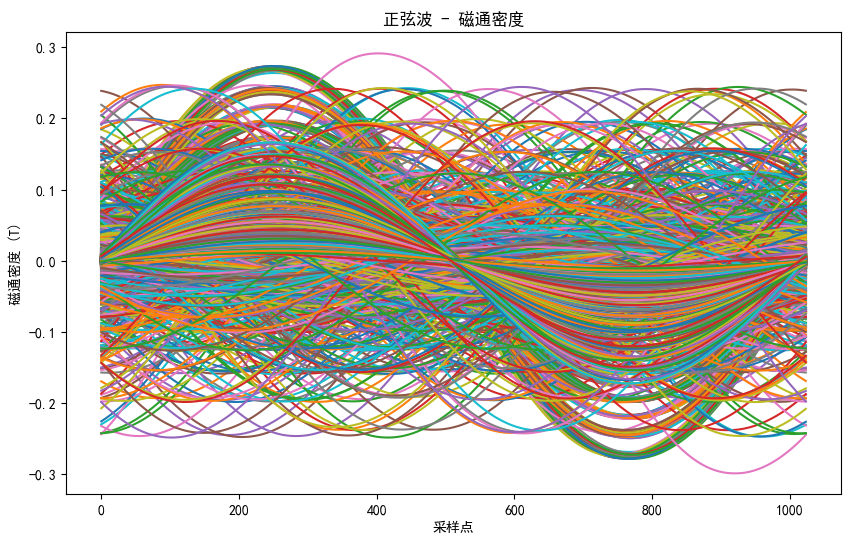

正弦波:
周期: 0
峰-谷差: 0.59064
平均值: -1.7016951074101453e-10


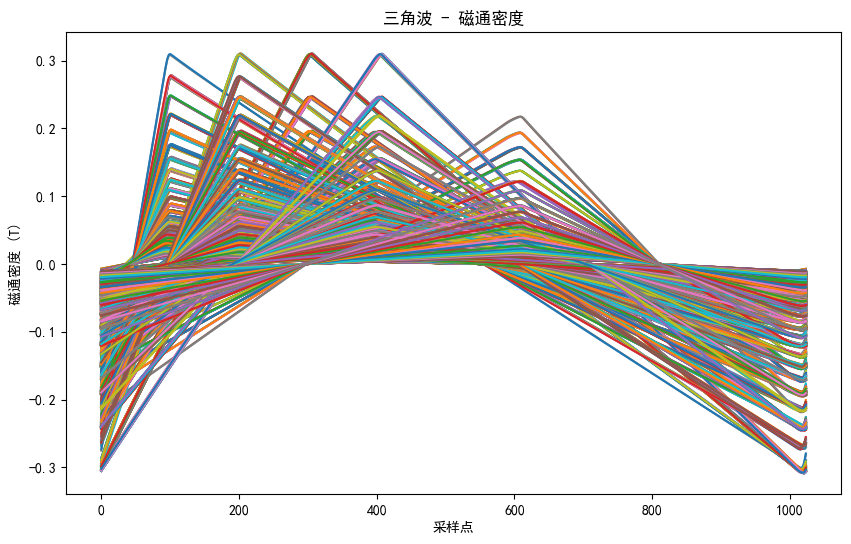

三角波:
周期: 0
峰-谷差: 0.619877958
平均值: -5.067953826292474e-13


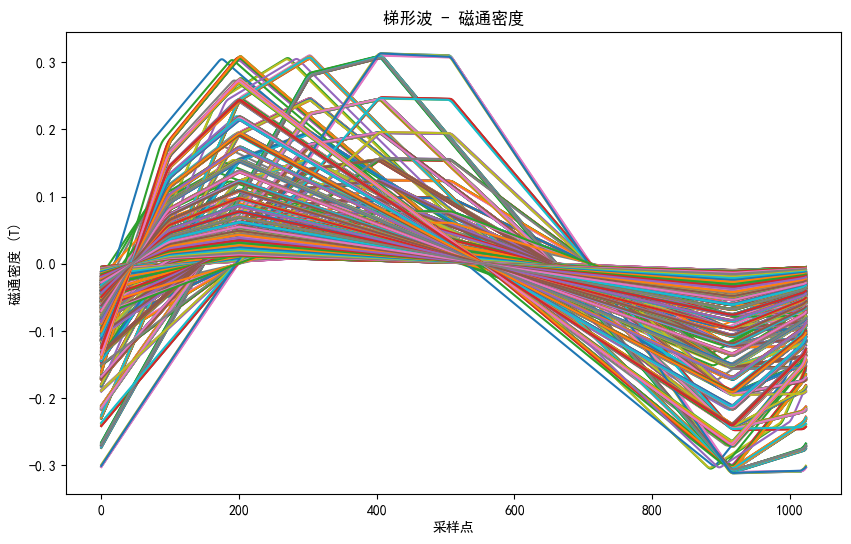

梯形波:
周期: 0
峰-谷差: 0.6257033080000001
平均值: 8.9050194855228e-14


In [12]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统使用SimHei字体
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
waveforms = ['正弦波', '三角波', '梯形波']
sampling_points = 1024
# 分析磁通密度的分布特征
def analyze_flux_density(df, waveform):
    subset = df[df['励磁波形'] == waveform]
    
    # 提取磁通密度数据
    flux_density =np.array(subset.iloc[:,4:])
    flux_density=flux_density.T
    # 计算特征
    period = np.diff(np.where(flux_density == 0, 1, 0), n=1).sum()  # 过零点数量
    peak_to_peak = np.ptp(flux_density)  # 峰-谷差
    mean_value = np.mean(flux_density)  # 平均值
    
    # 绘制磁通密度分布
    plt.figure(figsize=(10, 6))
    plt.plot(flux_density)
    plt.title(f'{waveform} - 磁通密度')
    plt.xlabel('采样点')
    plt.ylabel('磁通密度 (T)')
    plt.show()
    
    # 打印特征
    print(f"{waveform}:")
    print(f"周期: {period}")
    print(f"峰-谷差: {peak_to_peak}")
    print(f"平均值: {mean_value}")
for waveform in waveforms:
    analyze_flux_density(df, waveform)

In [13]:
df.columns = df.columns.astype(str)
import numpy as np
from sklearn.preprocessing import StandardScaler
x=df.iloc[:,4:]
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[0.72935478, 0.727232  , 0.72504171, ..., 0.73514696, 0.7333617 ,
        0.73140828],
       [0.71706194, 0.71510055, 0.71307349, ..., 0.72232556, 0.72073413,
        0.71894876],
       [0.66508866, 0.66306557, 0.6609724 , ..., 0.67036745, 0.66883507,
        0.66703006],
       ...,
       [0.32351921, 0.32469417, 0.32566627, ..., 0.32052883, 0.32113343,
        0.32224872],
       [0.2753965 , 0.2773331 , 0.279049  , ..., 0.27050423, 0.27164311,
        0.27339736],
       [0.15883904, 0.16261189, 0.16615158, ..., 0.14910399, 0.15167382,
        0.15506206]])

In [14]:
from scipy.fft import fft
feature=pd.DataFrame()
feature['max']=np.max(x,axis=1)
feature['min']=np.min(x,axis=1)
feature['mean']=np.mean(x,axis=1)
feature['std']=np.std(x,axis=1)
feature['fg']=np.max(x,axis=1)-np.min(x,axis=1)
x1=fft(x,axis=1)
sampling_rate=1024
# 计算幅度
magnitude = np.abs(x1)

# 计算功率
power = magnitude ** 2

# 特征提取
features = {}

# 平均幅度
features['mean_magnitude'] = np.mean(magnitude, axis=1)

# 幅度方差
features['variance_magnitude'] = np.var(magnitude, axis=1)

# 平均功率
features['mean_power'] = np.mean(power, axis=1)

# 功率方差
features['variance_power'] = np.var(power, axis=1)

# 峰值幅度
features['peak_magnitude'] = np.max(magnitude, axis=1)

# 峰值频率
peak_indices = np.argmax(magnitude, axis=1)
features['peak_frequency'] = np.array([np.fft.fftfreq(x.shape[1], d=1/sampling_rate)[idx] for idx in peak_indices])

# 能量集中度
energy = power / np.sum(power, axis=1, keepdims=True)
features['energy_focus'] = np.sum(energy, axis=1)

# 中心频率
features['center_frequency'] = np.sum(energy * np.fft.fftfreq(x.shape[1], d=1/sampling_rate), axis=1)

# # 偏度
# features['skewness'] = (np.mean((magnitude - features['mean_magnitude'][:, np.newaxis])**3, axis=1) / (features['variance_magnitude'][:, np.newaxis]**(3/2))).flatten()

# # 峰度
# features['kurtosis'] = (np.mean((magnitude - features['mean_magnitude'][:, np.newaxis])**4, axis=1) / (features['variance_magnitude'][:, np.newaxis]**2) - 3).flatten()

# 总能量
features['total_energy'] = np.sum(power, axis=1)

# 总方差
features['total_variance'] = np.sum((magnitude - features['mean_magnitude'][:, np.newaxis])**2, axis=1)

# features=pd.DataFrame(features)
features=pd.DataFrame(features)
feature=pd.concat([feature,features],axis=1)
feature

,max,min,mean,std,fg,mean_magnitude,variance_magnitude,mean_power,variance_power,peak_magnitude,peak_frequency,energy_focus,center_frequency,total_energy,total_variance
0,0.741709,-0.494390,-0.029699,0.442995,1.236099,1.022187,200.812329,201.857195,1.708820e+07,305.614340,1.0,1.0,-4.440892e-16,206701.767482,205631.824615
1,0.726565,-0.466309,-0.030991,0.417919,1.192875,0.987740,178.856087,179.831718,1.311843e+07,285.892763,1.0,1.0,0.000000e+00,184147.678835,183148.632963
2,0.672930,-0.377662,-0.028667,0.358726,1.050591,0.896275,131.810786,132.614094,6.450429e+06,238.693000,1.0,1.0,-3.996803e-15,135796.832218,134974.244723
3,0.721275,-0.498651,-0.040827,0.384148,1.219926,0.953504,151.909233,152.818403,8.726288e+06,257.592744,1.0,1.0,-2.453593e-14,156486.044268,155555.054285
4,0.734340,-0.574675,-0.048559,0.394166,1.309015,0.982409,160.545362,161.510490,9.623707e+06,263.821389,1.0,1.0,-1.154632e-14,165386.741938,164398.451158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0.449538,-0.540641,-0.003512,0.374560,0.990179,0.728513,143.143961,143.674692,9.923482e+06,267.097427,1.0,1.0,-1.998401e-15,147122.884452,146579.416416
12396,0.413701,-0.509148,-0.004174,0.342666,0.922849,0.680834,119.792222,120.255757,6.834937e+06,243.308011,1.0,1.0,-1.665335e-15,123141.895137,122667.235600
12397,0.338731,-0.417157,-0.006406,0.256645,0.755888,0.565634,67.169577,67.489519,1.888714e+06,176.057762,1.0,1.0,-5.095924e-14,69109.267395,68781.647161
12398,0.331573,-0.369125,-0.007570,0.220186,0.700698,0.519879,49.433835,49.704109,8.681215e+05,143.847800,1.0,1.0,-1.076916e-14,50897.007684,50620.247296


In [15]:
waveform_mapping = {
    '正弦波': 0,
    '三角波': 1,
    '梯形波': 2
}

# 应用映射
df['励磁波形'] = df['励磁波形'].map(waveform_mapping)
df1=df['励磁波形'].reset_index(drop=True)
data=pd.concat([feature,df1],axis=1)
data

,max,min,mean,std,fg,mean_magnitude,variance_magnitude,mean_power,variance_power,peak_magnitude,peak_frequency,energy_focus,center_frequency,total_energy,total_variance,励磁波形
0,0.741709,-0.494390,-0.029699,0.442995,1.236099,1.022187,200.812329,201.857195,1.708820e+07,305.614340,1.0,1.0,-4.440892e-16,206701.767482,205631.824615,0
1,0.726565,-0.466309,-0.030991,0.417919,1.192875,0.987740,178.856087,179.831718,1.311843e+07,285.892763,1.0,1.0,0.000000e+00,184147.678835,183148.632963,0
2,0.672930,-0.377662,-0.028667,0.358726,1.050591,0.896275,131.810786,132.614094,6.450429e+06,238.693000,1.0,1.0,-3.996803e-15,135796.832218,134974.244723,0
3,0.721275,-0.498651,-0.040827,0.384148,1.219926,0.953504,151.909233,152.818403,8.726288e+06,257.592744,1.0,1.0,-2.453593e-14,156486.044268,155555.054285,0
4,0.734340,-0.574675,-0.048559,0.394166,1.309015,0.982409,160.545362,161.510490,9.623707e+06,263.821389,1.0,1.0,-1.154632e-14,165386.741938,164398.451158,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0.449538,-0.540641,-0.003512,0.374560,0.990179,0.728513,143.143961,143.674692,9.923482e+06,267.097427,1.0,1.0,-1.998401e-15,147122.884452,146579.416416,2
12396,0.413701,-0.509148,-0.004174,0.342666,0.922849,0.680834,119.792222,120.255757,6.834937e+06,243.308011,1.0,1.0,-1.665335e-15,123141.895137,122667.235600,2
12397,0.338731,-0.417157,-0.006406,0.256645,0.755888,0.565634,67.169577,67.489519,1.888714e+06,176.057762,1.0,1.0,-5.095924e-14,69109.267395,68781.647161,2
12398,0.331573,-0.369125,-0.007570,0.220186,0.700698,0.519879,49.433835,49.704109,8.681215e+05,143.847800,1.0,1.0,-1.076916e-14,50897.007684,50620.247296,2


In [16]:
data.to_csv('data.csv')